In [33]:
import pandas as pd
import plotnine as p9
import numpy as np

In [34]:
athletes = pd.read_csv("olympic_athletes.csv")
hosts = pd.read_csv("olympic_hosts.csv")
medals = pd.read_csv("olympic_medals.csv")
results = pd.read_csv("olympic_results.csv")

results_pkl = pd.read_pickle("olympic_results.pkl")

In [35]:
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage 
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)")

print(testerCle(hosts, "game_slug"))
print(hosts.head())

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (53, 7) (lignes, colonnes)
None
          game_slug         game_end_date       game_start_date  \
0      beijing-2022  2022-02-20T12:00:00Z  2022-02-04T15:00:00Z   
1        tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
2  pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
3          rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
4        sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   

        game_location         game_name game_season  game_year  
0               China      Beijing 2022      Winter       2022  
1               Japan        Tokyo 2020      Summer       2020  
2   Republic of Korea  PyeongChang 2018      Winter       2018  
3              Brazil          Rio 2016      Summer       2016  
4  Russian Federation        Sochi 2014      Winter       2014  


In [36]:
results_de = results[(results["country_code"] == "DE") | (results["country_code"] == "DDDE")] 
results_de

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
119,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,32,Germany,DE,GER,https://olympics.com/en/athletes/niklas-bachsl...,Niklas BACHSLEITNER,NaN,NaN
143,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,21,Germany,DE,GER,https://olympics.com/en/athletes/florian-wilms...,Florian WILMSMANN,NaN,NaN
144,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,23,Germany,DE,GER,https://olympics.com/en/athletes/tobias-mueller-1,Tobias MUELLER,NaN,NaN
145,Freestyle Skiing,Men's Ski Cross,beijing-2022,Athlete,NaN,NaN,False,14,Germany,DE,GER,https://olympics.com/en/athletes/daniel-bohnacker,Daniel BOHNACKER,NaN,NaN
170,Freestyle Skiing,Women's Freeski Big Air,beijing-2022,Athlete,NaN,NaN,False,18,Germany,DE,GER,https://olympics.com/en/athletes/alia-delia-ei...,Alia Delia EICHINGER,64.75,POINTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162639,Alpine Skiing,slalom men,lake-placid-1980,Athlete,NaN,NaN,NaN,25,Federal Republic of Germany,DE,FRG,https://olympics.com/en/athletes/josef-ferstl,Josef FERSTL,119300,TIME
162693,Alpine Skiing,slalom men,lake-placid-1980,Athlete,NaN,NaN,NaN,DSQ,Federal Republic of Germany,DE,FRG,https://olympics.com/en/athletes/albert-burger,Albert BURGER,NaN,IRM
162698,Equestrian Jumping,Jumping Individual mixed,montreal-1976,Athlete,GOLD,NaN,NaN,1,Federal Republic of Germany,DE,FRG,https://olympics.com/en/athletes/alwin-schocke...,Alwin SCHOCKEMÖHLE,0.00,POINTS
162708,Equestrian Jumping,Jumping Individual mixed,montreal-1976,Athlete,NaN,NaN,True,10,Federal Republic of Germany,DE,FRG,https://olympics.com/en/athletes/hans-gunter-w...,Hans Günter WINKLER,16.00,POINTS


In [37]:
hosts_summer = hosts[hosts.game_season == "Summer"]
print(hosts_summer.head())

      game_slug         game_end_date       game_start_date  game_location  \
1    tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z          Japan   
3      rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z         Brazil   
5   london-2012  2012-08-12T19:00:00Z  2012-07-27T07:00:00Z  Great Britain   
7  beijing-2008  2008-08-24T12:00:00Z  2008-08-08T00:00:00Z          China   
9   athens-2004  2004-08-29T18:00:00Z  2004-08-13T06:00:00Z         Greece   

      game_name game_season  game_year  
1    Tokyo 2020      Summer       2020  
3      Rio 2016      Summer       2016  
5   London 2012      Summer       2012  
7  Beijing 2008      Summer       2008  
9   Athens 2004      Summer       2004  


In [38]:
data = pd.merge(results_de, hosts_summer, left_on="slug_game", right_on="game_slug", how = "inner")

data_medals = data[~data.medal_type.isnull()]
data_medals

total_medals = []
year = []

for i in range(0,len(hosts_summer)*4+12,4):
    total_medals.append(len(data_medals[data_medals.game_year == (2020 - i)]))
    year.append(2020-i)

df_medal_country = pd.DataFrame((zip(total_medals, year)), columns = ['Total_medals', 'Year'])
print(df_medal_country)

    Total_medals  Year
0             37  2020
1             42  2016
2             44  2012
3             41  2008
4             49  2004
5             56  2000
6             65  1996
7             82  1992
8            142  1988
9             59  1984
10           126  1980
11           129  1976
12           106  1972
13            51  1968
14            50  1964
15            42  1960
16            20  1956
17            22  1952
18             0  1948
19             0  1944
20             0  1940
21            84  1936
22            20  1932
23            30  1928
24             0  1924
25             0  1920
26             0  1916
27            25  1912
28            13  1908
29            15  1904
30             9  1900
31            13  1896


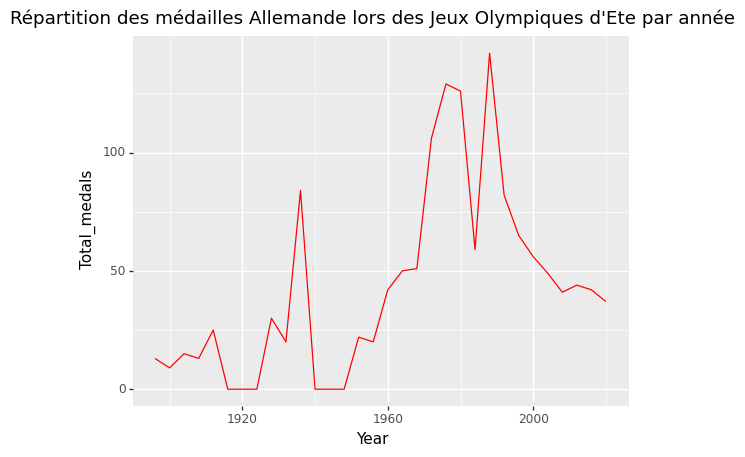

<ggplot: (163940208782)>

In [39]:
plot = p9.ggplot(data=df_medal_country,
           mapping=p9.aes(x="Year", y="Total_medals"))
plot + p9.geom_line(color='red') + p9.ggtitle("Répartition des médailles Allemande lors des Jeux Olympiques d'Ete par année")

In [40]:
for i in range(0,len(hosts_summer)*4+12,4):
    total_medals.append(len(data_medals[data_medals.game_year == (2020 - i)]))
    year.append(2020-i)

medals_de = medals[(medals["country_code"] == "DE") | (medals["country_code"] == "DDDE")] 
data_2 = pd.merge(medals_de, hosts_summer, left_on="slug_game", right_on="game_slug", how = "inner")
test = data_2.athlete_full_name.value_counts()
test.head(12)
#top = pd.DataFrame(test)
#top.reset_index(inplace = True)
#top12_bis = top[:12]
#top12_bis.athlete_full_name
#top12_bis.rename(columns = {'index':'Athlete', 'athlete_full_name':'Nombre_de_medaille',
#                              }, inplace = True)
#top12_bis

Birgit FISCHER             7
Isabell WERTH              6
Wilfried DIETRICH          5
Olaf HEUKRODT              5
Ralf SCHUMANN              5
Karl-Alfred SCHWARZMANN    5
Konrad FREY                5
Heike DRECHSLER            5
Andreas DITTMER            5
Roland MATTHES             5
Karin JANZ                 5
Dagmar HASE                5
Name: athlete_full_name, dtype: int64

In [41]:
characters = "'([])"
data_athlete_grp = data_medals[~data_medals.athletes.isnull()]

# partie longue à lancer
for j in range(len(data_athlete_grp)):
    data_athlete_grp.athletes.iloc[j] = str(data_athlete_grp.athletes.iloc[j])
    for x in range(len(characters)):
        data_athlete_grp.athletes.iloc[j] = data_athlete_grp.athletes.iloc[j].replace(characters[x],"")

data_athlete_grp.reset_index(inplace = True)
data_athlete_grp

for i in range(len(data_athlete_grp)):
    data_athlete_grp.athletes.iloc[i] = data_athlete_grp.athletes.iloc[i].split(",")

data_athlete_grp

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\2517862143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\2517862143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\2517862143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,...,athlete_full_name,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,12,Diving,Men's Synchronised 3m Springboard,tokyo-2020,GameTeam,BRONZE,"[Patrick HAUSDING, https://olympics.com/en/at...",False,3,Germany,...,NaN,404.73,POINTS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
1,13,Diving,Women's Synchronised 3m Springboard,tokyo-2020,GameTeam,BRONZE,"[Lena HENTSCHEL, https://olympics.com/en/athl...",False,3,Germany,...,NaN,284.97,POINTS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,24,Canoe Sprint,Men's Canoe Double 1000m,tokyo-2020,GameTeam,BRONZE,"[Sebastian BRENDEL, https://olympics.com/en/a...",False,3,Germany,...,NaN,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,26,Canoe Sprint,Men's Kayak Double 1000m,tokyo-2020,GameTeam,SILVER,"[Max HOFF, https://olympics.com/en/athletes/m...",False,2,Germany,...,NaN,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
4,224,Sailing,Nacra 17 Mixed,tokyo-2020,GameTeam,BRONZE,"[Paul KOHLHOFF, https://olympics.com/en/athle...",False,3,Germany,...,NaN,63,POINTS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,5541,Cycling Track,2000m tandem men,amsterdam-1928,GameTeam,BRONZE,"[Karl KÖTHER, https://olympics.com/en/athlete...",NaN,3,Germany,...,NaN,NaN,NaN,amsterdam-1928,1928-08-12T19:00:00Z,1928-05-17T07:00:00Z,Netherlands,Amsterdam 1928,Summer,1928
114,5564,Rowing,pair without coxswain 2 men,amsterdam-1928,GameTeam,GOLD,"[Bruno MÜLLER, https://olympics.com/en/athlet...",NaN,1,Germany,...,NaN,NaN,NaN,amsterdam-1928,1928-08-12T19:00:00Z,1928-05-17T07:00:00Z,Netherlands,Amsterdam 1928,Summer,1928
115,5595,Tennis,mixed doubles mixed,stockholm-1912,GameTeam,GOLD,"[Dora KÖRING, https://olympics.com/en/athlete...",NaN,1,Germany,...,NaN,NaN,NaN,stockholm-1912,1912-07-27T20:00:00Z,1912-05-05T08:00:00Z,Sweden,Stockholm 1912,Summer,1912
116,5731,Rowing,Coxless Pairs Men,london-1908,GameTeam,BRONZE,"[Martin STAHNKE, https://olympics.com/en/athl...",NaN,3,Germany,...,NaN,NaN,NaN,london-1908,1908-10-31T20:09:00Z,1908-04-27T08:00:00Z,Great Britain,London 1908,Summer,1908


In [77]:
data_athlete_grp.rename(columns = {'index':'base'}, inplace = True)

for a in range(len(data_athlete_grp)):
    #print(data_athlete_grp.loc[a,"athletes"])
    data_medals.at[data_athlete_grp.base[a],"athletes"] = data_athlete_grp.loc[a,"athletes"]

data_medals

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\4210739221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,athlete_full_name,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
12,Diving,Men's Synchronised 3m Springboard,tokyo-2020,GameTeam,BRONZE,"[Patrick HAUSDING, https://olympics.com/en/at...",False,3,Germany,DE,...,NaN,404.73,POINTS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
13,Diving,Women's Synchronised 3m Springboard,tokyo-2020,GameTeam,BRONZE,"[Lena HENTSCHEL, https://olympics.com/en/athl...",False,3,Germany,DE,...,NaN,284.97,POINTS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
24,Canoe Sprint,Men's Canoe Double 1000m,tokyo-2020,GameTeam,BRONZE,"[Sebastian BRENDEL, https://olympics.com/en/a...",False,3,Germany,DE,...,NaN,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
25,Canoe Sprint,Men's Kayak Four 500m,tokyo-2020,GameTeam,GOLD,NaN,False,1,Germany,DE,...,NaN,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
26,Canoe Sprint,Men's Kayak Double 1000m,tokyo-2020,GameTeam,SILVER,"[Max HOFF, https://olympics.com/en/athletes/m...",False,2,Germany,DE,...,NaN,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,Gymnastics Artistic,team parallel bars men,athens-1896,GameTeam,GOLD,NaN,NaN,1,Germany,DE,...,NaN,NaN,POINTS,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896
5984,Gymnastics Artistic,team horizontal bar men,athens-1896,GameTeam,GOLD,NaN,NaN,1,Germany,DE,...,NaN,NaN,POINTS,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896
5985,Gymnastics Artistic,pommel horse men,athens-1896,Athlete,SILVER,NaN,NaN,2,Germany,DE,...,Hermann WEINGÄRTNER,NaN,POINTS,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896
6004,Cycling Road,individual road race men,athens-1896,Athlete,SILVER,NaN,NaN,2,Germany,DE,...,Anton Gödrich,12674000,TIME,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896


In [43]:
top12 = ["Birgit FISCHER", "Isabell WERTH", "Reiner KLIMKE", "Natalie GEISENBERGER",
         "Kristin OTTO", "Karin JANZ", "Roland MATTHES", "Karin JANZ",
         "Ralf SCHUMANN", "Dagmar HAZE", "Konrad FREY", "Karl ALFRED"]
nom = medals_de.athlete_full_name.values.tolist()
medaille_type = medals_de.medal_type.values.tolist()

athlete = []
type_medaille = []

for i in range(len(top12)):
    for j in range(len(medals_de)):
        if nom[j] == top12[i]:
            type_medaille.append(medaille_type[j])
            athlete.append(nom[j])

for i in range(len(top12)):
    for j in range(len(data_medals)):
        if type(data_medals.athletes.iloc[j]) == list:
            for k in range(len(data_medals.athletes.iloc[j])):
                if data_medals.athletes.iloc[j][k] == top12[i]:
                    type_medaille.append(medaille_type[j])
                    athlete.append(data_medals.athletes.iloc[j][k])
                    print(data_medals.iloc[][k])
   
            

df_medaille_athlete = pd.DataFrame((zip(athlete, type_medaille)), columns = ['Athlete', 'Type_Medaille'])
df_medaille_athlete

SyntaxError: invalid syntax (1755684561.py, line 23)

In [44]:
(
    p9.ggplot(data=df_medaille_athlete, mapping =  p9.aes(x='Athlete', fill='Type_Medaille'))
    + p9.scale_fill_manual(values=["#C49C48", "#FFD700", "#C0C0C0"])
    + p9.geom_histogram(bins=12, binwidth = 0.5,
                        colour="#000000",
                        size=1,
                        alpha=0.7)  
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
)

NameError: name 'df_medaille_athlete' is not defined

In [45]:
data
Total_athlete = []
year = []

for i in range(0,len(hosts_summer)*4+12,4):
    Total_athlete.append(len(data[data.game_year == (2020 - i)]))
    
print(Total_athlete)

data_athlete_medaille = df_medal_country.assign(Total_athlete = Total_athlete)

data_athlete_medaille.head()

[249, 272, 283, 266, 296, 316, 316, 322, 473, 258, 255, 367, 423, 335, 210, 178, 133, 220, 0, 0, 0, 231, 70, 122, 0, 0, 0, 126, 78, 61, 60, 88]


,Total_medals,Year,Total_athlete
0,37,2020,249
1,42,2016,272
2,44,2012,283
3,41,2008,266
4,49,2004,296


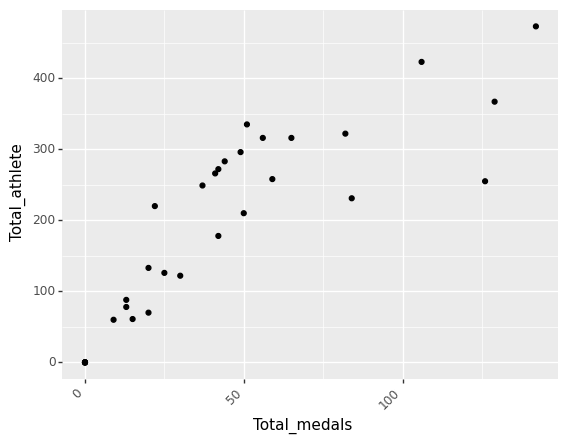

<ggplot: (163932397713)>

In [46]:
(
    p9.ggplot(data=data_athlete_medaille, mapping =  p9.aes(x='Total_medals', y='Total_athlete'))
    + p9.geom_point()  
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
)

In [47]:
top12 = top12_bis.Athlete

year_list = data_2.game_year.values.tolist()
nom = data_2.athlete_full_name.values.tolist()
medaille_type = data_2.medal_type.values.tolist()


Year_1 = []
Type_medaille_1 = []

for j in range(len(nom)):
    if nom[j] == "Birgit FISCHER":
        Type_medaille_1.append(medaille_type[j])
        Year_1.append(year_list[j])
        
df_medaille_top1 = pd.DataFrame((zip(Year_1, Type_medaille_1)), columns = ['Year', 'Type_Medaille'])
print(df_medaille_top1)
silver = df_medaille_top1[df_medaille_top1["Type_Medaille"] == "SILVER"]
gold = df_medaille_top1[df_medaille_top1["Type_Medaille"] == "GOLD"]
df_gold_silver = pd.merge(silver, gold, on="Year", how = "outer")



NameError: name 'top12_bis' is not defined

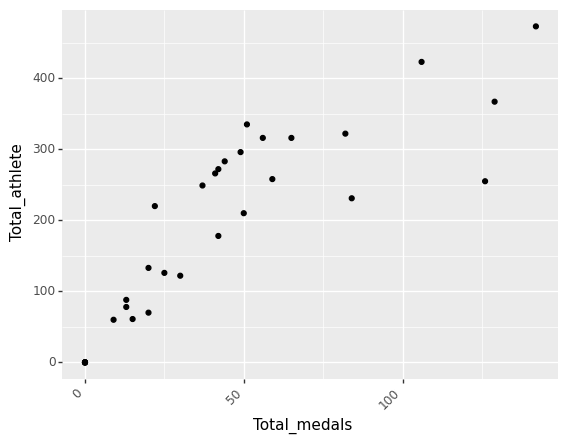

<ggplot: (163942031183)>

In [48]:
(
    p9.ggplot(data=data_athlete_medaille, mapping =  p9.aes(x='Total_medals', y='Total_athlete'))
    + p9.geom_point()  
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
)

In [49]:
discipline = list(data.discipline_title.unique())
year = []
for i in range(1896,2024,4):
    for j in range(len(discipline)):
        year.append(i)
print(len(year), len(discipline)*32)
new_data = pd.DataFrame(discipline*32, columns = ["Discipline"])
new_data = new_data.assign(Year = year)

1600 1600


In [50]:
new_data.iloc[1:51]

,Discipline,Year
1,Diving,1896
2,Canoe Sprint,1896
3,Cycling Road,1896
4,Football,1896
5,Boxing,1896
6,Handball,1896
7,Triathlon,1896
8,Table Tennis,1896
9,Canoe Slalom,1896
10,Marathon Swimming,1896


In [51]:
data[(data.discipline_title == "Trampoline")]
tot_athlete = []
for i in range(len(new_data)):
    tot_athlete.append(len(data[(data.discipline_title == new_data.Discipline.iloc[i]) & 
                           (data.game_year == new_data.Year.iloc[i])]))
data_fin = new_data.assign(athlete = tot_athlete)
data_fin

,Discipline,Year,athlete
0,Shooting,1896,0
1,Diving,1896,0
2,Canoe Sprint,1896,0
3,Cycling Road,1896,1
4,Football,1896,0
...,...,...,...
1595,Synchronized Swimming,2020,0
1596,Canoe Marathon,2020,0
1597,Polo,2020,0
1598,Figure skating,2020,0


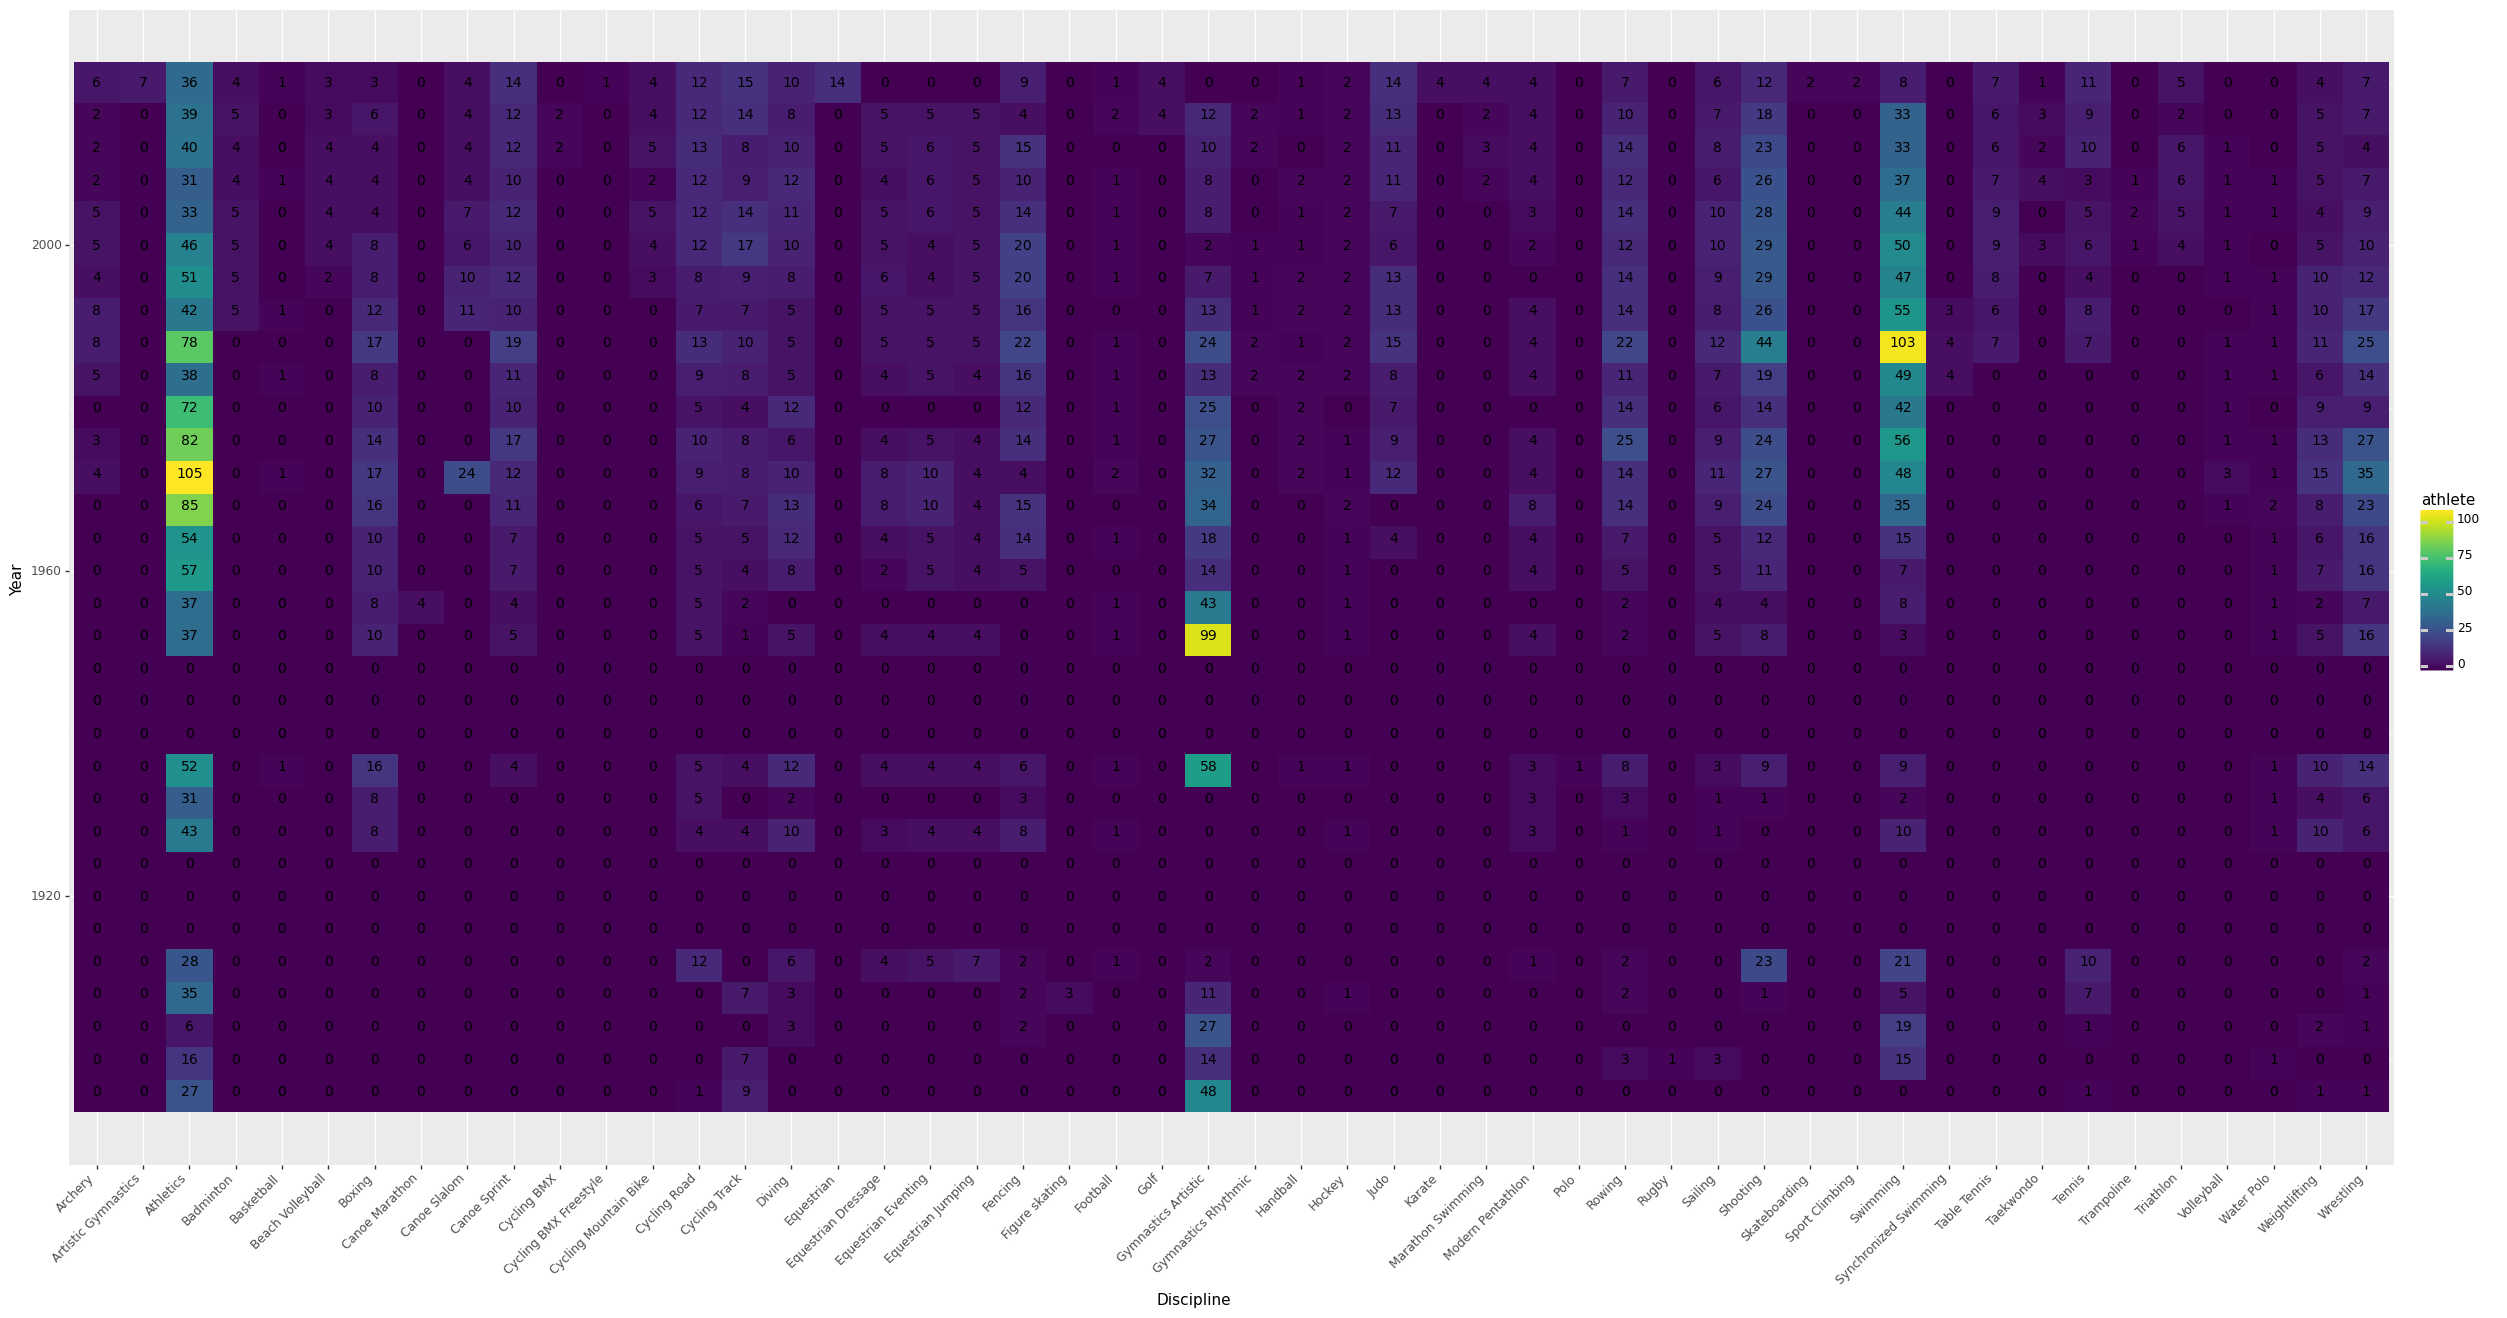

<ggplot: (163930612218)>

In [52]:
(
    p9.ggplot(data = data_fin, mapping = p9.aes(x = "Discipline", y = "Year", fill = "athlete"))
    + p9.geom_tile(p9.aes(width=1,height=5))
    + p9.geom_text(p9.aes(label='athlete'),size=10)
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
    + p9.theme(figure_size=(30,15))

)

In [147]:
df_best = pd.merge(data, athletes, on="athlete_full_name", how = "inner")


In [148]:
df_best = df_best[~df_best.medal_type.isnull()]
df_best = df_best[~df_best.athlete_medals.isnull()]

In [149]:
df_best_unique = df_best.drop_duplicates(subset = ["athlete_full_name"])

In [150]:
df_best_unique

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,game_location,game_name,game_season,game_year,athlete_url_y,games_participations,first_game,athlete_year_birth,athlete_medals,bio
4,Shooting,25m rapid fire pistol 60 shots men,rio-2016,Athlete,GOLD,NaN,NaN,1,Germany,DE,...,Brazil,Rio 2016,Summer,2016,https://olympics.com/en/athletes/christian-reitz,4,Beijing 2008,1987.0,\n\n\n1\n\nG\n\n\n\n1\n\nB\n\n,NaN
15,Shooting,25m pistol (30+30 shots) women,rio-2016,Athlete,SILVER,NaN,NaN,2,Germany,DE,...,Brazil,Rio 2016,Summer,2016,https://olympics.com/en/athletes/monika-karsch,2,Rio 2016,1982.0,\n\n\n1\n\nS\n\n,NaN
23,Diving,3m springboard men,rio-2016,Athlete,BRONZE,NaN,NaN,3,Germany,DE,...,Brazil,Rio 2016,Summer,2016,https://olympics.com/en/athletes/patrick-hausding,4,Beijing 2008,1989.0,\n\n\n1\n\nS\n\n\n\n2\n\nB\n\n,NaN
38,Canoe Sprint,C-1 1000m (canoe single) men,rio-2016,Athlete,GOLD,NaN,NaN,1,Germany,DE,...,Brazil,Rio 2016,Summer,2016,https://olympics.com/en/athletes/sebastian-bre...,3,London 2012,1988.0,\n\n\n3\n\nG\n\n\n\n1\n\nB\n\n,\n\n\nSebastian Brendel had the following podi...
81,Table Tennis,Men's Singles,tokyo-2020,Athlete,BRONZE,NaN,False,3,Germany,DE,...,Japan,Tokyo 2020,Summer,2020,https://olympics.com/en/athletes/dimitrij-ovtc...,4,Beijing 2008,1988.0,\n\n\n2\n\nS\n\n\n\n4\n\nB\n\n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,Swimming,200m backstroke men,paris-1900,Athlete,GOLD,NaN,NaN,1,Germany,DE,...,France,Paris 1900,Summer,1900,https://olympics.com/en/athletes/ernst-hoppenberg,1,Paris 1900,1878.0,\n\n\n2\n\nG\n\n,\n\n\nErnst Hoppenberg was the son of the dire...
4708,Athletics,100m men,athens-1896,Athlete,SILVER,NaN,NaN,2,Germany,DE,...,Greece,Athens 1896,Summer,1896,https://olympics.com/en/athletes/fritz-hofmann,2,Athens 1896,1871.0,\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,"\n\n\nPrimarily, a track and field athlete, Fr..."
4726,Gymnastics Artistic,horizontal bar men,athens-1896,Athlete,SILVER,NaN,NaN,2,Germany,DE,...,Greece,Athens 1896,Summer,1896,https://olympics.com/en/athletes/alfred-flatow,1,Athens 1896,1869.0,\n\n\n3\n\nG\n\n\n\n1\n\nS\n\n,\n\n\nFlatow began his athletic career in 1888...
4733,Gymnastics Artistic,vault men,athens-1896,Athlete,GOLD,NaN,NaN,1,Germany,DE,...,Greece,Athens 1896,Summer,1896,https://olympics.com/en/athletes/carl-schumann,1,Athens 1896,1869.0,\n\n\n4\n\nG\n\n,"\n\n\nCompeting in gymnastics, athletics, weig..."


In [151]:
characters = "\n"

# partie longue à lancer
for j in range(len(df_best_unique)):
    df_best_unique.athlete_medals.iloc[j] = str(df_best_unique.athlete_medals.iloc[j])
    for x in range(len(characters)):
        df_best_unique.athlete_medals.iloc[j] = df_best_unique.athlete_medals.iloc[j].replace(characters[x],"")


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\213891242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\213891242.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [152]:
for i in range(len(df_best_unique)):
    df_best_unique.athlete_medals.iloc[i] = list(df_best_unique.athlete_medals.iloc[i])


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\2988530576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [153]:
df_best_unique['GOLD'] = 0
df_best_unique['SILVER'] = 0
df_best_unique['BRONZE'] = 0

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\939334790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\939334790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\939334790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,game_year,athlete_url_y,games_participations,first_game,athlete_year_birth,athlete_medals,bio,GOLD,SILVER,BRONZE
4,Shooting,25m rapid fire pistol 60 shots men,rio-2016,Athlete,GOLD,NaN,NaN,1,Germany,DE,...,2016,https://olympics.com/en/athletes/christian-reitz,4,Beijing 2008,1987.0,"[1, G, 1, B]",NaN,0,0,0
15,Shooting,25m pistol (30+30 shots) women,rio-2016,Athlete,SILVER,NaN,NaN,2,Germany,DE,...,2016,https://olympics.com/en/athletes/monika-karsch,2,Rio 2016,1982.0,"[1, S]",NaN,0,0,0
23,Diving,3m springboard men,rio-2016,Athlete,BRONZE,NaN,NaN,3,Germany,DE,...,2016,https://olympics.com/en/athletes/patrick-hausding,4,Beijing 2008,1989.0,"[1, S, 2, B]",NaN,0,0,0
38,Canoe Sprint,C-1 1000m (canoe single) men,rio-2016,Athlete,GOLD,NaN,NaN,1,Germany,DE,...,2016,https://olympics.com/en/athletes/sebastian-bre...,3,London 2012,1988.0,"[3, G, 1, B]",\n\n\nSebastian Brendel had the following podi...,0,0,0
81,Table Tennis,Men's Singles,tokyo-2020,Athlete,BRONZE,NaN,False,3,Germany,DE,...,2020,https://olympics.com/en/athletes/dimitrij-ovtc...,4,Beijing 2008,1988.0,"[2, S, 4, B]",NaN,0,0,0


In [165]:
for j in range(len(df_best_unique)):
    for i in range(0,len(df_best_unique.athlete_medals.iloc[j]),2):
        if df_best_unique.athlete_medals.iloc[j][i+1] == "G":
            df_best_unique.GOLD.iloc[j] = int(df_best_unique.athlete_medals.iloc[j][i])
        elif df_best_unique.athlete_medals.iloc[j][i+1] == "S":
            df_best_unique.SILVER.iloc[j] = int(df_best_unique.athlete_medals.iloc[j][i])
        else :
            df_best_unique.BRONZE.iloc[j] = int(df_best_unique.athlete_medals.iloc[j][i])


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\598025920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\598025920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\598025920.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [158]:
df_best_unique['Total'] = 0

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\3307545635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


int

In [169]:
for i in range(len(df_best_unique)):
    df_best_unique.Total.iloc[i] = df_best_unique.GOLD.iloc[i] + df_best_unique.SILVER.iloc[i] + df_best_unique.BRONZE.iloc[i] 

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_4880\2137152896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [172]:
df_best_unique.Total.value_counts()

1     401
2     159
3      57
4      31
5      14
6      13
8       3
12      2
7       2
10      1
Name: Total, dtype: int64

In [177]:
testt = df_best_unique.sort_values(by = ["Total", "GOLD"], ascending=False)

In [179]:
top10 = testt.iloc[0:9]

discipline_title                                              Canoe Sprint
event_title                                     K1 500m kayak single women
slug_game                                                   barcelona-1992
participant_type                                                   Athlete
medal_type                                                            GOLD
athletes                                                               NaN
rank_equal                                                             NaN
rank_position                                                            1
country_name                                                       Germany
country_code                                                            DE
country_3_letter_code                                                  GER
athlete_url_x              https://olympics.com/en/athletes/birgit-fischer
athlete_full_name                                           Birgit FISCHER
value_unit               

PlotnineError: 'Aesthetics must either be length one, or the same length as the data'

In [219]:
liste_nom = list(top10.athlete_full_name)

In [227]:
Name = []
i=0
for count in top10.Total :
    for j in range(count):
        Name.append(top10.athlete_full_name.iloc[i])
    i+=1

a
a
a
a
a
a
a
a
a


In [232]:
df_fin = pd.DataFrame(Name, columns=["Name"])

In [257]:
medal = []

for i in range(len(top10)):
    for j in range(top10.Total.iloc[i]):
        if j < top10.GOLD.iloc[i]:
            print(j)
            medal.append("GOLD")
        elif j >= top10.GOLD.iloc[i] and j< (top10.GOLD.iloc[i] + top10.SILVER.iloc[i]):
            medal.append("SILVER")
        elif j >= (top10.GOLD.iloc[i] + top10.SILVER.iloc[i]):
            print("aaaaaaaaaaaaaaaaaaaaaa")
            medal.append("BRONZE")

0
1
2
3
4
5
6
7
8 12
9 12
10 12
11 12
0
1
2
3
4
5
6
7 12
8 12
9 12
10 12
11 12
0 4
1 4
2 4
3 4
aaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaa
0
1
2
3
4
5
aaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaa
0
1
2
3
4 8
5 8
6 8
7 8
0
1
2
3
4 6
5 6
aaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaa
0
1
2 5
3 5
4 5
aaaaaaaaaaaaaaaaaaaaaa
aaaaaaaaaaaaaaaaaaaaaa
0
1 6
2 6
3 6
4 6
5 6
aaaaaaaaaaaaaaaaaaaaaa
0
1
2
3
4
5


In [261]:
df_final = df_fin.assign(Medal = medal)

In [263]:
df_final

,Name,Medal
0,Birgit FISCHER,GOLD
1,Birgit FISCHER,GOLD
2,Birgit FISCHER,GOLD
3,Birgit FISCHER,GOLD
4,Birgit FISCHER,GOLD
...,...,...
73,Kristin OTTO,GOLD
74,Kristin OTTO,GOLD
75,Kristin OTTO,GOLD
76,Kristin OTTO,GOLD


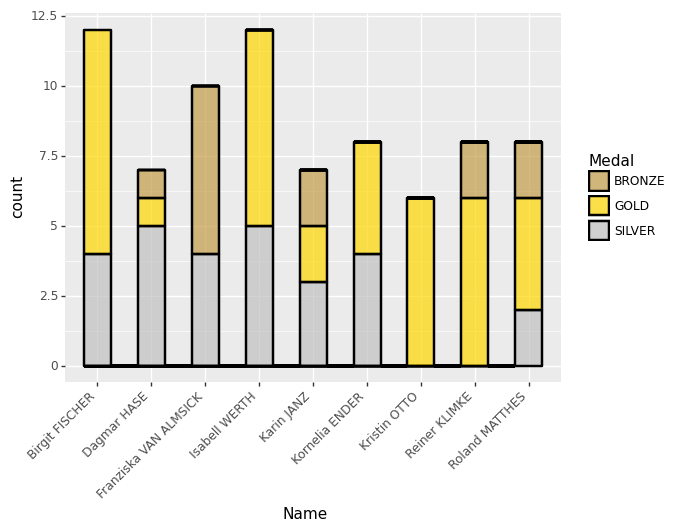

<ggplot: (163940153835)>

In [264]:
(
    p9.ggplot(data=df_final, mapping =  p9.aes(x='Name', fill="Medal"))
    + p9.scale_fill_manual(values=["#C49C48", "#FFD700", "#C0C0C0"])
    + p9.geom_histogram(bins=10, binwidth = 0.5,
                        colour="#000000",
                        size=1,
                        alpha=0.7)  
    + p9.theme(axis_text_x = p9.element_text(angle=45, hjust=1))
)